In [357]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from os import system

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor

#Build the model with the best hyper parameters
from sklearn.model_selection import cross_val_score
#importing the zscore for scaling
from scipy.stats import zscore
#Importing PCA for dimensionality reduction and visualization
from sklearn.decomposition import PCA

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error , r2_score

#Grid search to tune model parameters for SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

import warnings; warnings.filterwarnings('ignore')

# Data Exploration / Cleaning / Wrangling

In [251]:
#Reading data
concrete_data = pd.read_csv('concrete.csv')
df_orig = pd.DataFrame(concrete_data)

#Creating copy and maintain the original dataset
df = df_orig.copy()
df.info()

print("Shape of data is - ",np.shape(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
Shape of data is -  (1030, 9)


- Datatype of each attribute is listed. All are numeric except arrtibutes.
- There are 9 attributes of which 1 is strengt and 1030 records.
- These are the attributes used to prepare cement. 
- It is given that the concrete compressive strength is a highly nonlinear function of age and ingredients


- Cement    : measured in kg in a m3 mixture 
- Blast     : measured in kg in a m3 mixture 
- Fly ash   : measured in kg in a m3 mixture 
- Water     : measured in kg in a m3 mixture 
- Superplasticizer   : measured in kg in a m3 mixture 
- Coarse Aggregate   : measured in kg in a m3 mixture 
- Fine Aggregate   : measured in kg in a m3 mixture 
- Age     : day (1~365)  
- Concrete compressive strength measured in MPa

In [194]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
df.describe().T #include = 'all'

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


- We observe the central values, std and an overveiew of data.
- Looking at the min we understand there are no negative values. 
- Since all are Numeric values it doesn't contain any weird string values. Next step is to check null/ missing values.

In [6]:
#Checking for missing values
df.isna().apply(pd.value_counts)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
False,1030,1030,1030,1030,1030,1030,1030,1030,1030


- We observe that there are no null values present in the given dataset. 

In [7]:
#Display records having null values
df[df.isna().any(axis=1)]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


# Univariate & Multivariate analysis

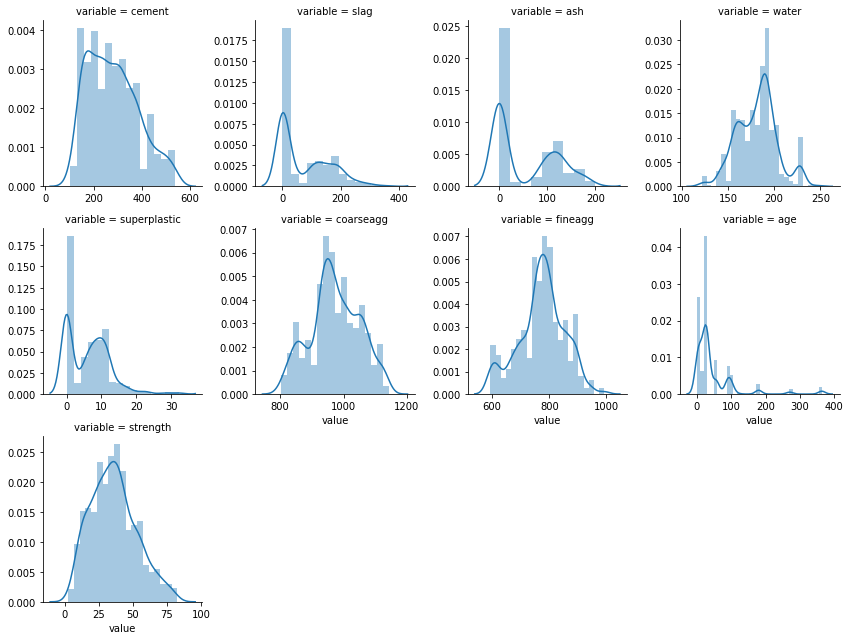

In [7]:
#create numeric plots to find the distribution of individual attributes.
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

- The very first observation is the attributes superplastic, ash and slag have many 0 values. It means that we can prepare concrete without these ingredients. 
- So to check whether it's really possible, I referred https://www.cement.org/cement-concrete-applications/how-concrete-is-made and understood more about the attribues. The 0 value for the 3 attibutes mentioned may not be an error. So we need not handle it.

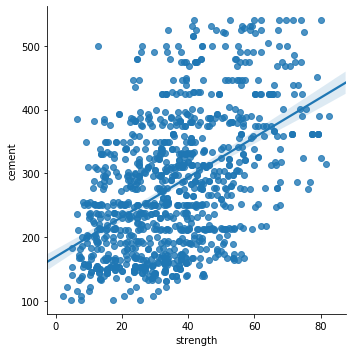

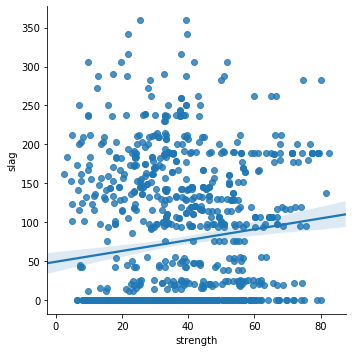

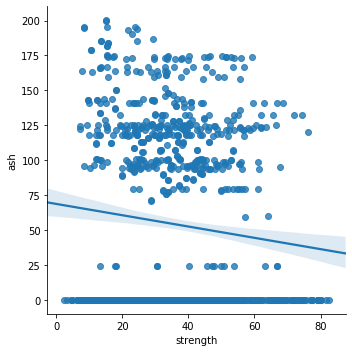

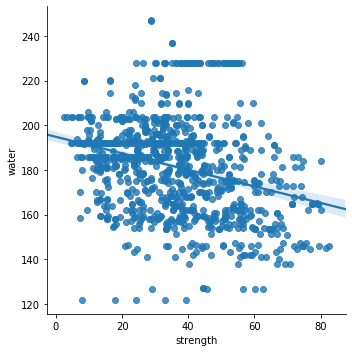

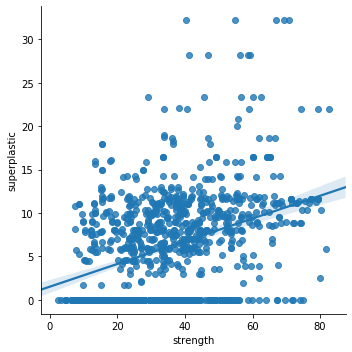

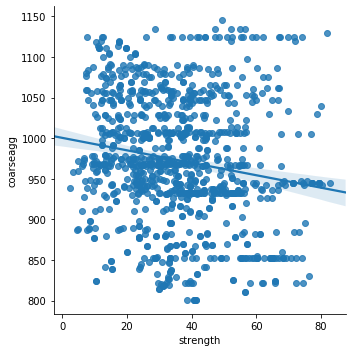

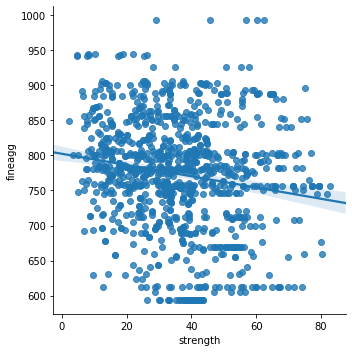

In [8]:
#plt.figure(figsize=(8,8))
#for i in range(1,8):
for val in df.columns[:-2]:
#plt.subplot(4,4,i)
 sns.lmplot(x='strength',y=val,data=df)
#plt.subplots_adjust(hspace=0.4)

- The above plots are used to identify relationship between independent attributes and the final target attribute strength. 
- Strength is plotted on X axis and we can see that it has high positive correlation with cement.
- Adding superplastic to the mix also increases the strength of concrete.
- Fineagg and coarseagg doesn't really have any correlation but we see minor negative trend. 

In [9]:
df.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64


# Checking for outliers

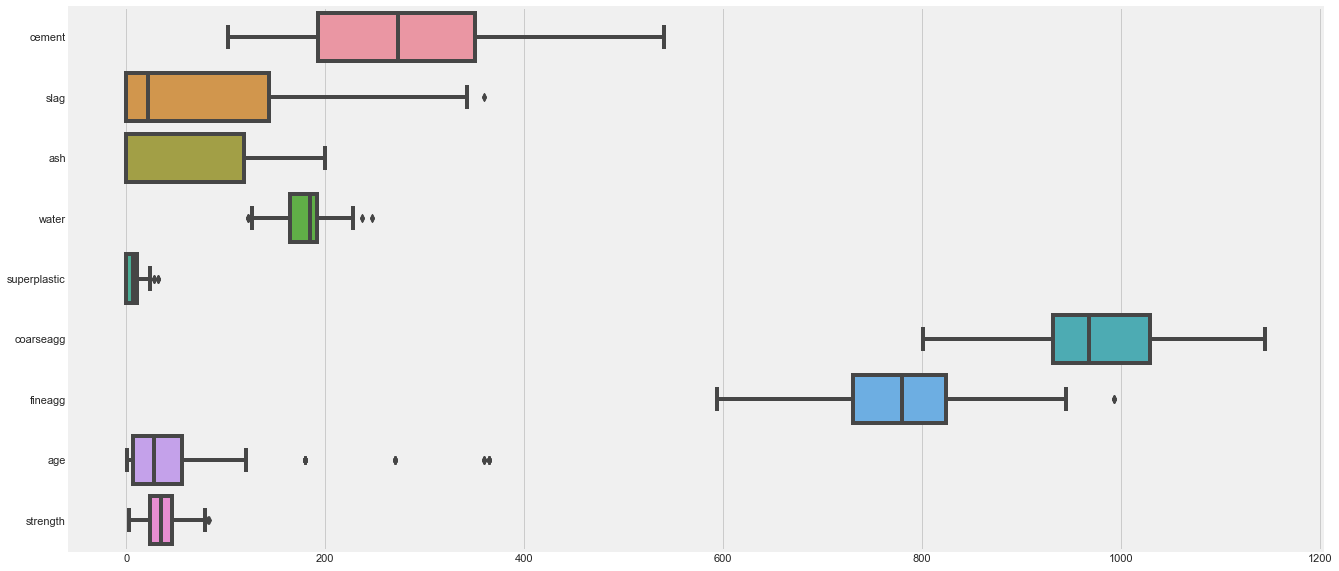

In [200]:
img = plt.figure(figsize = (20,10))
sns.boxplot(data = df, orient = 'h')

In [252]:
#find the outliers and replace them by median

for col_name in df.columns[:-1]:
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    
    df.loc[(df[col_name] < low) | (df[col_name] > high), col_name] = df[col_name].median()

- Used quantile method to check outliers in these column. It appears that scaled_radius_of_gyration.1 has maximum outliers around 15 of them, which represents about 1.77% of number of rows.

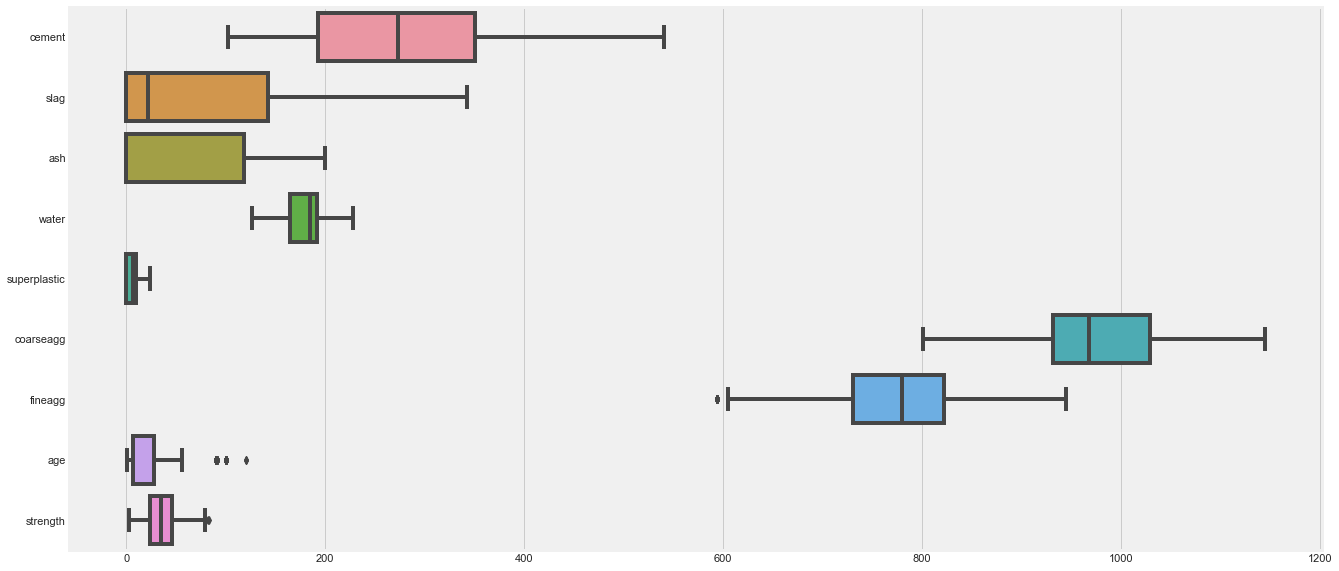

In [202]:
img = plt.figure(figsize = (20,10))
sns.boxplot(data = df, orient = 'h')

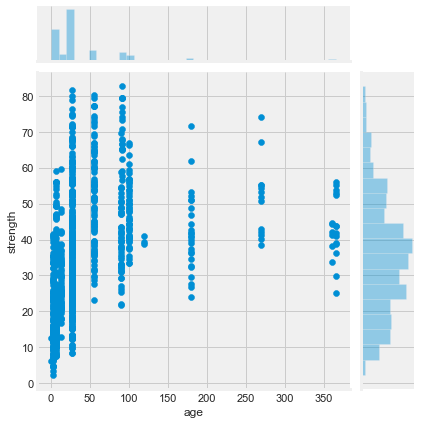

In [205]:
sns.jointplot(y="strength", x="age", data=df_orig);

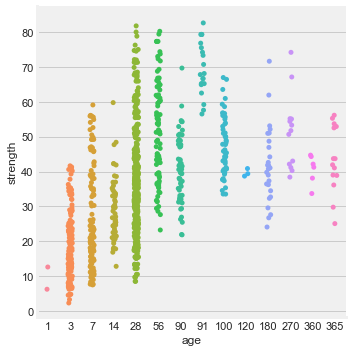

In [204]:
sns.catplot(y="strength",x="age",data=df_orig)

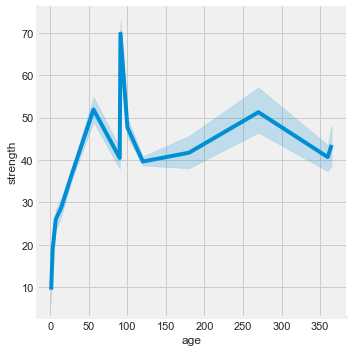

In [203]:
sns.relplot(x="age", y="strength", kind="line", data=df_orig)

- Looks loke the strength increase when age is 100 specifically 

In [17]:
# Absolute correlation of independent variables with 'Target' i.e. the target variable
absCorrwithDep = []
allVars = df.drop('strength', axis = 1).columns

for var in allVars:
    absCorrwithDep.append(abs(df['strength'].corr(df[var])))

display(pd.DataFrame([allVars, absCorrwithDep], index = ['Variable', 'Correlation']).T.\
        sort_values('Correlation', ascending = False))

,Variable,Correlation
7,age,0.515301
0,cement,0.497832
4,superplastic,0.345839
3,water,0.307042
6,fineagg,0.182517
5,coarseagg,0.164935
1,slag,0.137609
2,ash,0.105755


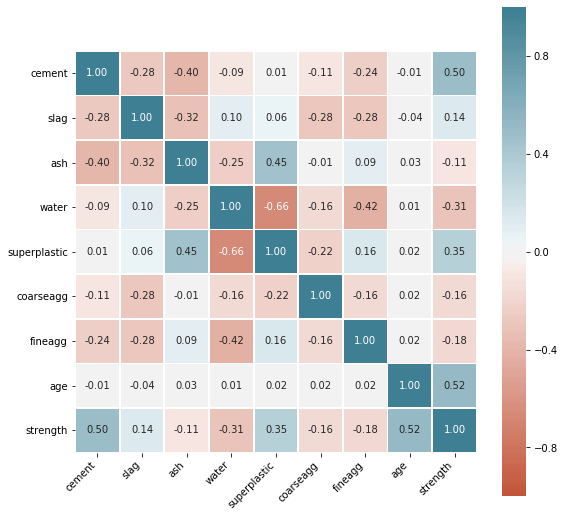

In [18]:
corr = df.corr()
plt.figure(figsize=(9,9))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True, fmt='.2f', annot_kws={'size': 10},
    linewidths=0.8
)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

- None of the columns have a correlation above a threshold and thus none to be dropped.
- age, cement and superplastic are some of the columns that have strong influence over target variable.

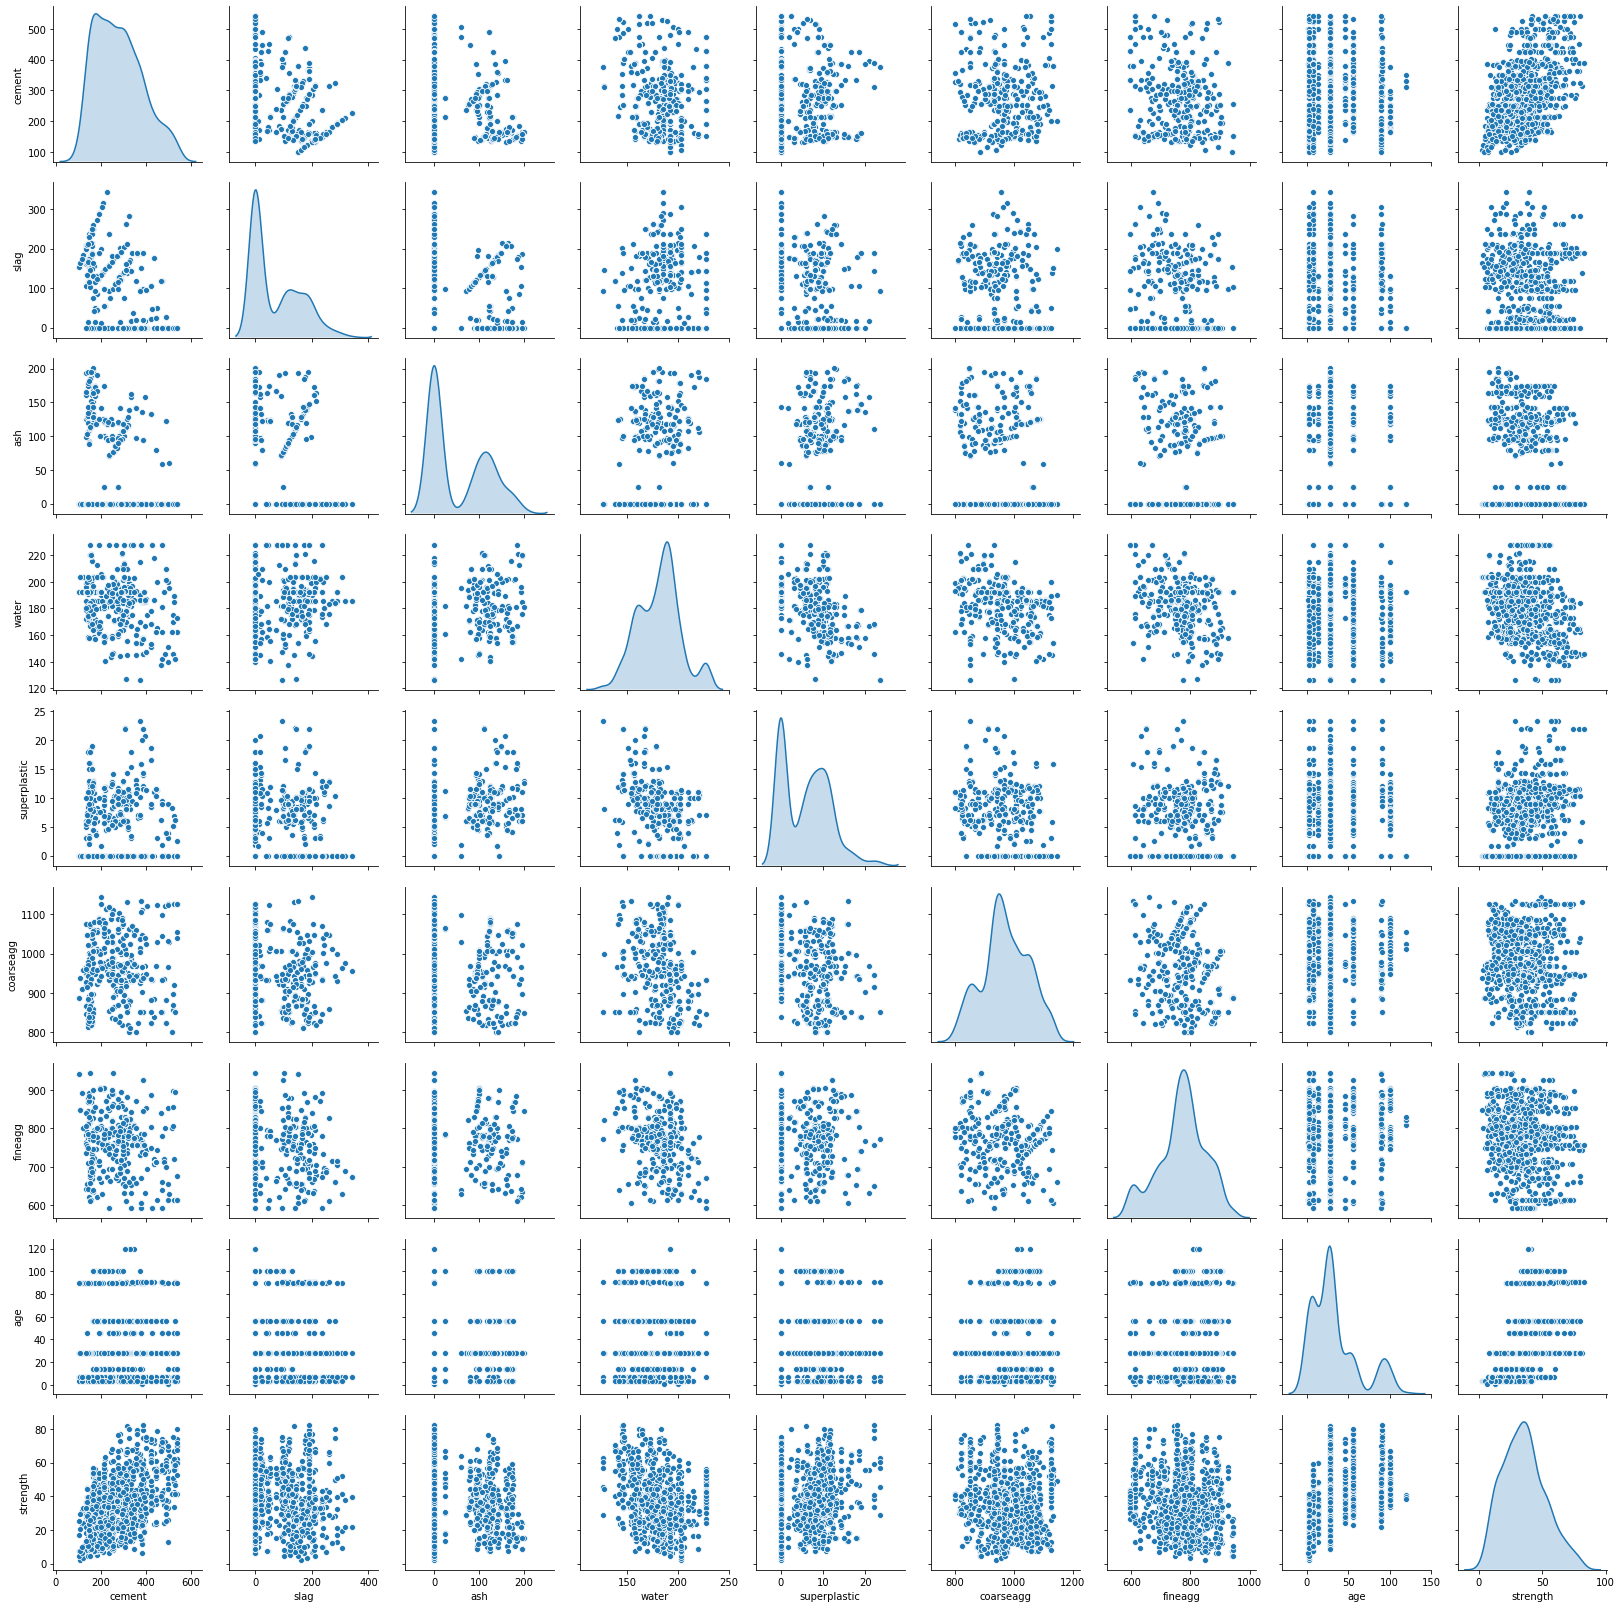

In [19]:
sns.pairplot(df,diag_kind='kde')

- Well, there are no evident cluster or gaussian that we can identify by looking at the diagonal kde plot. 

- Looking at the lower trangle in the above pairplot, all figures have a shape of scattered and cloud structures. This indicates there is very week relationship of the independent variables among each other. Except for superplastic vs water which seems to be have a strong negative correlation.
strength has a rugby shaped scattered data points with cement, which indicates cement is a strong predictor for comprehensive strength compared to all other features.
- Looking at the upper traingle for density plots also depicts the same. No density distibution is linearly associated with any other features except for cement vs strength.
- As we have already discussed, slag, ash and superplastic have a huge volume of 0s in their distribution making them behave as 2 different clusters. So is also interpreted from density diagram where they have 2 clearly distinguished densities in each plot.
- Parallel scatter plots and straight density plots of age across indicates it is a predictor which has the lowest relationship with any other features even with the target variable.

- Leverage points:
Leverage values play very important role in regressions analysis. They often form the basis of regression diagnostics as measures of influential observations in the explanatory variables. It is generally believed that high leverage points are responsible for causing masking of outliers in linear regression.

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     322.1
Date:                Thu, 30 Apr 2020   Prob (F-statistic):          4.71e-273
Time:                        22:08:20   Log-Likelihood:                -3712.6
No. Observations:                1030   AIC:                             7443.
Df Residuals:                    1021   BIC:                             7488.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       40.5554     19.416      2.089   

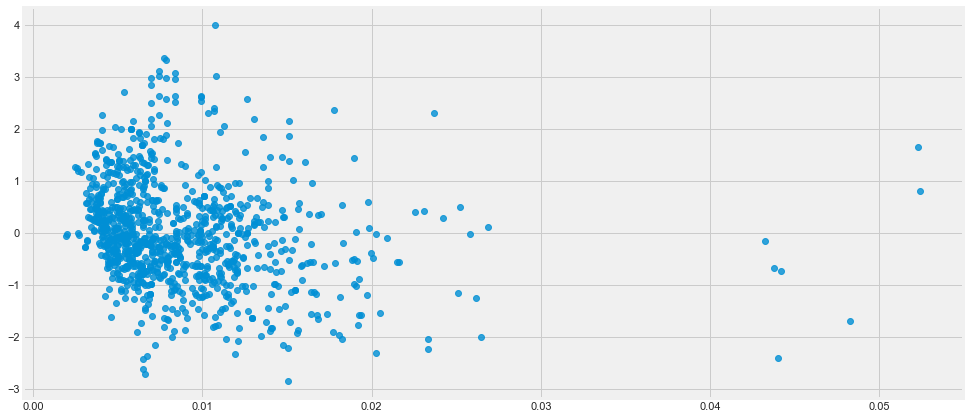

In [206]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'strength ~ cement + slag + ash + water + superplastic + coarseagg + fineagg + age', data = df).fit()
print(lm.summary())

influence = lm.get_influence()
resid_student = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag

print('\n')
print('Leverage v.s. Studentized Residuals')
fig = plt.figure(figsize = (15, 7.2))
sns.regplot(leverage, lm.resid_pearson,  fit_reg = False)

## Feature Engineering Teachniques

In [253]:
df_z = df.apply(zscore)
X_data = df_z.drop(columns=["strength"])
Y_target = df_z["strength"]

random_state = 9
np.random.seed(random_state)

X_train, X_test, y_train, y_test = train_test_split(X_data,Y_target,
                                                    test_size=0.3, random_state = random_state)


In [254]:
df_z.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.339017,1.625902,-0.847144,1.060879,-1.091166,-0.014398,-0.305676,-0.153159,-0.355018
1,-1.074790,-0.363717,1.096078,-1.134020,0.881615,1.388141,0.300692,-0.656933,-0.737108
2,-0.298384,-0.858192,0.648965,0.279067,-0.086509,-0.206121,1.126981,-0.153159,-0.395144
3,-0.145209,0.477594,-0.847144,2.250592,-1.091166,-0.526517,-1.303578,-0.153159,0.600806
4,-1.209776,1.290784,-0.847144,0.565570,0.571085,0.958372,-0.964165,-0.153159,-1.049727


In [255]:
from sklearn import svm
clr = svm.SVR()  
clr.fit(X_train , y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [256]:
y_pred = clr.predict(X_test)

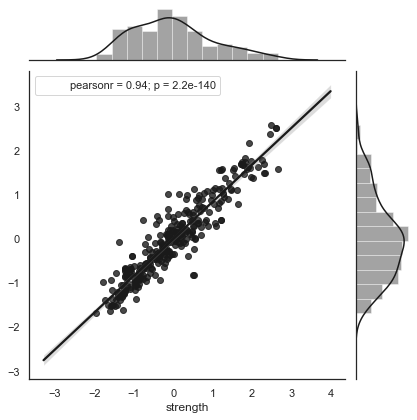

In [257]:
sns.set(style="darkgrid", color_codes=True)
           
with sns.axes_style("white"):
    j = sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");
    j.annotate(stats.pearsonr)
    plt.show()

- Dropping the variable "ASH" since it has lowest correlation with target variable. 

In [258]:
X_data = df_z.drop(columns=["strength","ash"])
Y_target = df_z["strength"]

random_state = 9
np.random.seed(random_state)

X_train, X_test, y_train, y_test = train_test_split(X_data,Y_target,
                                                    test_size=0.3, random_state = random_state)


In [259]:
clr = svm.SVR()  
clr.fit(X_train , y_train)
y_pred = clr.predict(X_test)

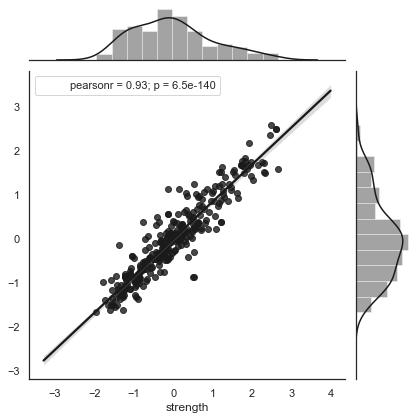

In [260]:
sns.set(style="darkgrid", color_codes=True)
           
with sns.axes_style("white"):
    j = sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");
    j.annotate(stats.pearsonr)
    plt.show()

- We observe that the attribute ash didn't contribute much since the model score didn't change.

In [214]:
df_z =  df_z.drop(columns="ash")
df = df.drop(columns="ash")

In [215]:
cluster_range = range( 2, 6 )   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,2.424745e+07
1,3,1.804140e+07
2,4,1.524918e+07
3,5,1.348615e+07


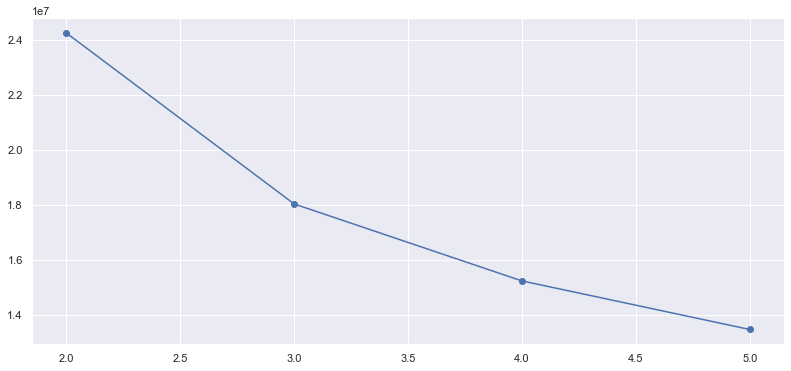

In [216]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

- Looks like we may have 3 to 4 clusters

In [217]:
cluster = KMeans( n_clusters = 3, random_state = 9 )
cluster.fit(df_z)

prediction=cluster.predict(df_z)
df_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

df_z_copy = df_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

centroids = cluster.cluster_centers_
centroids

array([[ 0.73369969,  0.11308509, -0.92141604,  0.92168773, -0.40696254,
         0.15111162,  0.28574533,  1.04768595],
       [-0.54700612,  0.95574485,  0.80852504, -0.4251458 , -0.4199178 ,
        -0.57573102, -0.10858506, -0.25346999],
       [-0.09853205, -0.76325405,  0.03630272, -0.31223331,  0.57491112,
         0.31277345, -0.11350123, -0.52019847]])

In [223]:
centroid_df = pd.DataFrame(centroids, columns = list(df) )
centroid_df

,cement,slag,water,superplastic,coarseagg,fineagg,age,strength
0,0.733700,0.113085,-0.921416,0.921688,-0.406963,0.151112,0.285745,1.047686
1,-0.547006,0.955745,0.808525,-0.425146,-0.419918,-0.575731,-0.108585,-0.253470
2,-0.098532,-0.763254,0.036303,-0.312233,0.574911,0.312773,-0.113501,-0.520198


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024D53D92888>,
      dtype=object)

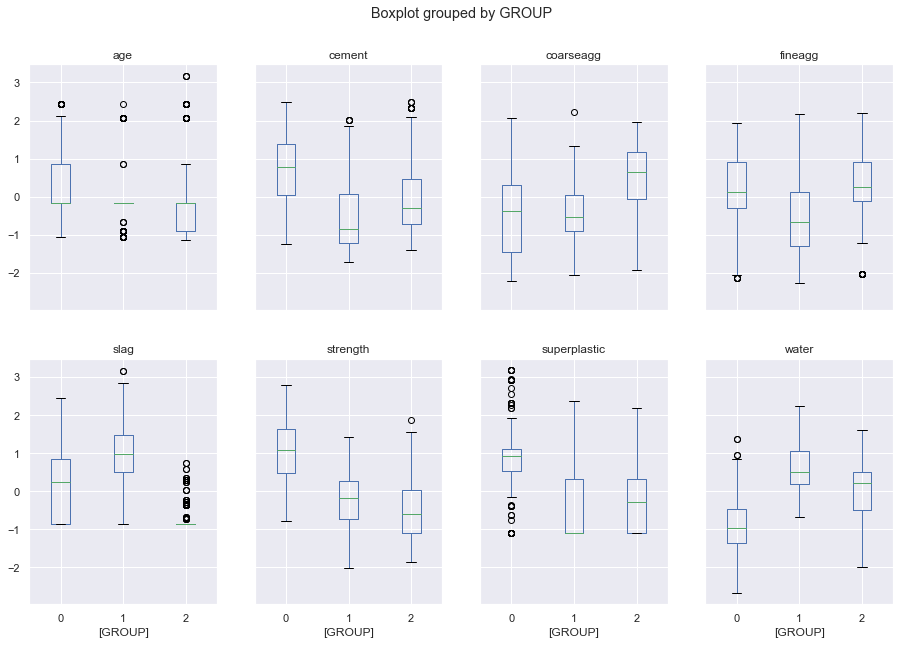

In [224]:
import matplotlib.pylab as plt

df_z.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

In [225]:
# Addressing outliers at group level

data = df_z  
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(df_z['GROUP']))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024D4B051CC8>,
      dtype=object)

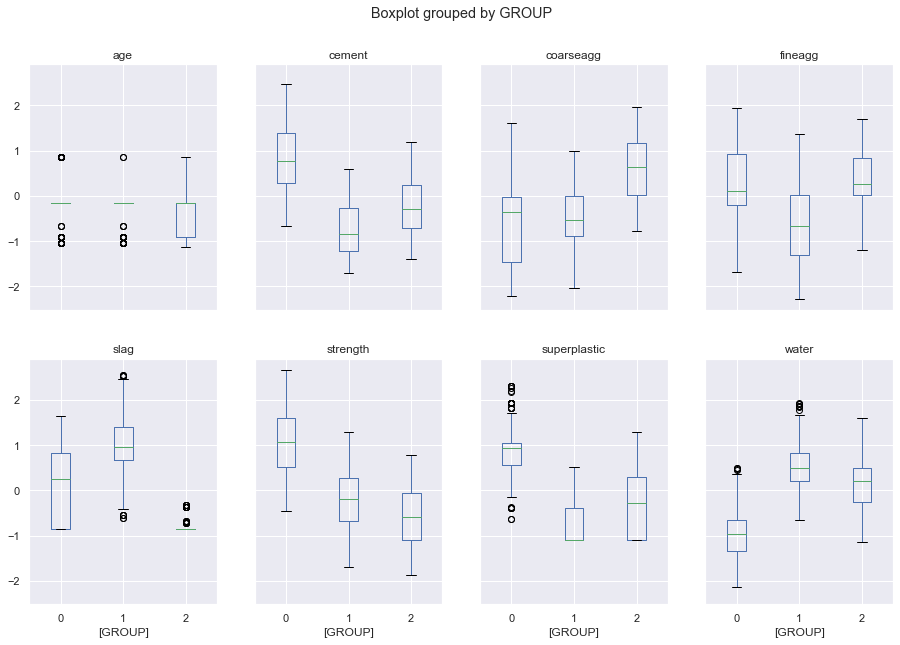

In [226]:
concat_data.boxplot(by = 'GROUP', layout=(2,4), figsize=(15, 10))

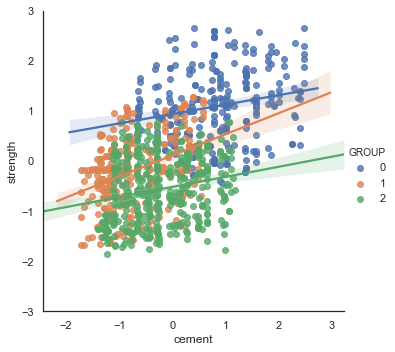

In [227]:
var = 'cement'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

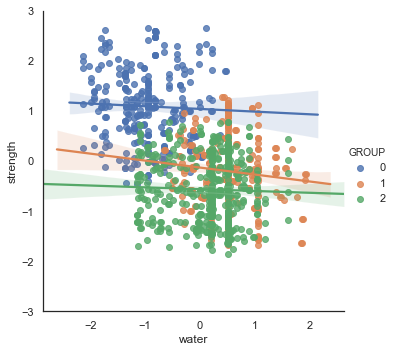

In [228]:
var = 'water'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

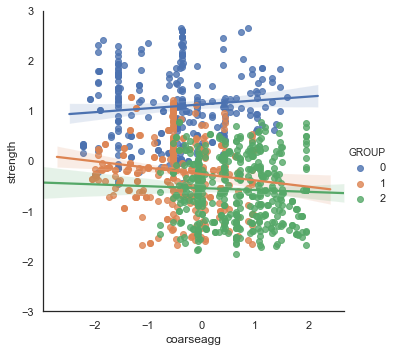

In [229]:
var = 'coarseagg'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

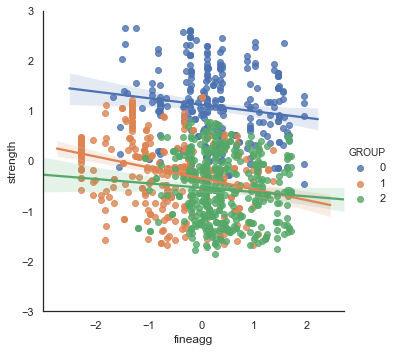

In [230]:
var = 'fineagg'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

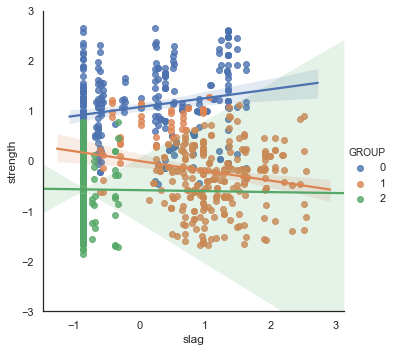

In [231]:
var = 'slag'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

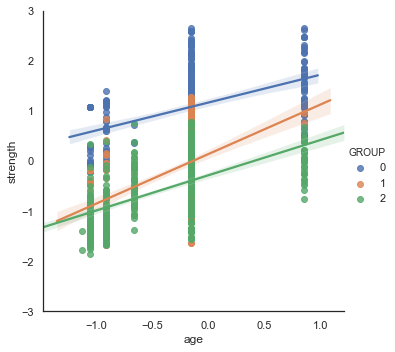

In [232]:
var = 'age'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

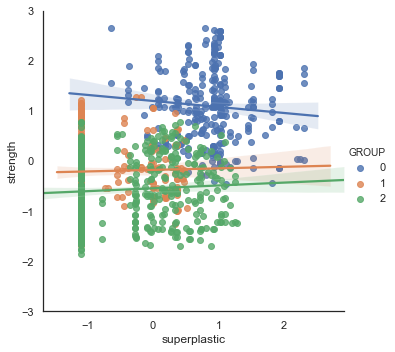

In [234]:
var = 'superplastic'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

- From the above plots after K-means clustering, we created 3 clusters and analysed the relation of each cluster of each attribute with strength.
- Almost all the lines if you observe are horizontal which means that it doesn't make sense for all attributes except age and cement where we can see some colinerity of clusters with strength of concrete. 
- But since the cement also doesn't show clusters with strong correlation we may not divide it further. 
- We may analyze age more for this.
- Also we see overlap of clusters and there were new outliers too after we imputed it once.

### Lets try PCA on the dataset and see the performance.

In [266]:
df_z = df.apply(zscore)
# Create a covariance matrix and calculate eigen values
pca = PCA().fit(df_z.drop('strength', axis=1))
# calculate variance ratios
var = pca.explained_variance_ratio_;var

array([0.27112429, 0.17554142, 0.16247544, 0.1267052 , 0.12341382,
       0.11338586, 0.02196813, 0.00538585])

In [267]:
# cumulative sum of variance explained with [n] features
eigen_vals = np.round(pca.explained_variance_ratio_, decimals=3)*100
np.cumsum(eigen_vals)

array([27.1, 44.7, 60.9, 73.6, 85.9, 97.2, 99.4, 99.9])

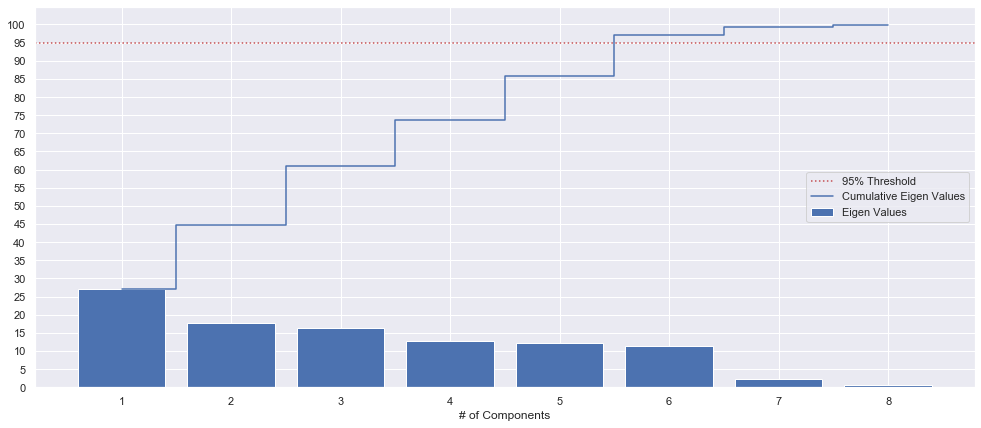

In [269]:
threshold =95
plt.figure(figsize=(15,7))
plt.axhline(y=threshold, color='r', linestyle=':', label='95% Threshold')
plt.bar(np.arange(1, len(eigen_vals) + 1), eigen_vals, label='Eigen Values')
plt.plot(np.arange(1, len(np.cumsum(eigen_vals))+1), np.cumsum(eigen_vals), 
         drawstyle='steps-mid', label='Cumulative Eigen Values')
plt.yticks(np.arange(0,105,5))
_, _ = plt.xticks(np.arange(1,9,1)), plt.xlabel('# of Components')
plt.legend()

- We observe 6 features of importance. 

In [270]:
# Create a new matrix using the 6 components
X = df_z.drop('strength', axis=1)
X_proj = PCA(n_components=6).fit_transform(X)
y = df_z.strength
X_proj.shape

(1030, 6)

In [271]:
X_proj_train, X_proj_test, y_train, y_test = train_test_split(X_proj, y, test_size=0.2, random_state=1)

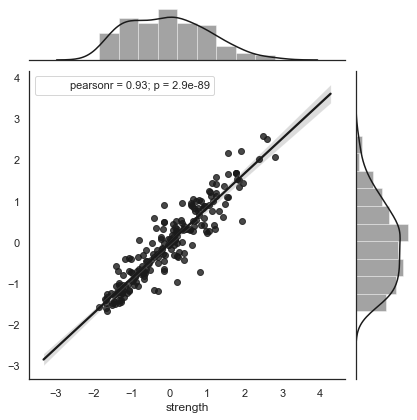

In [272]:
clr = svm.SVR()  
clr.fit(X_proj_train , y_train)
y_pred = clr.predict(X_proj_test)

sns.set(style="darkgrid", color_codes=True)
           
with sns.axes_style("white"):
    j = sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");
    j.annotate(stats.pearsonr)
    plt.show()

# Modeling

# Split data in 70:30 using train_test_split

In [321]:
df_ml = df_z.copy()

X_data = df_ml.drop(columns=["strength"])#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_rf},index={'1'})
results = results[['Method', 'accuracy']]
results
Y_target = df_ml["strength"]

random_state = 9
np.random.seed(random_state)

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X_data,Y_target,
                                                    test_size=0.3, random_state = random_state)

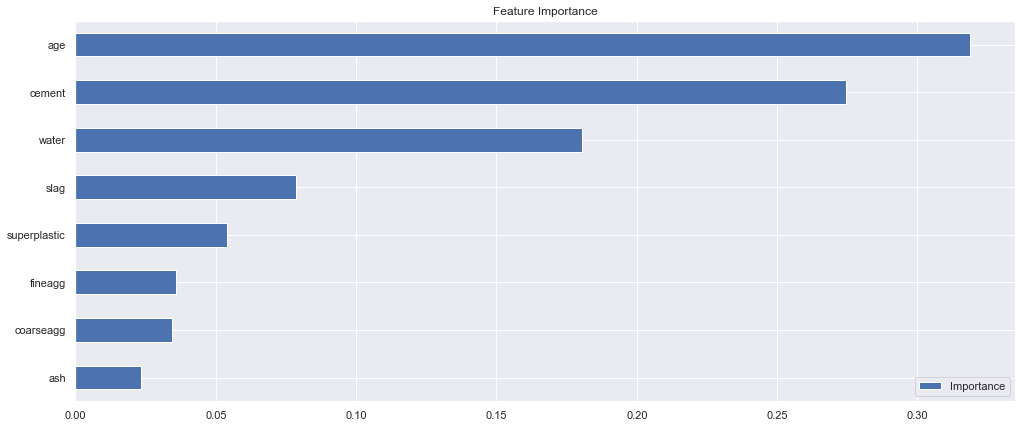

In [323]:
# Feature Importance plot using Random Forest Regressor
rf = RandomForestRegressor().fit(X_train, y_train)
pd.DataFrame(rf.feature_importances_, index = df_ml.columns[:-1], 
             columns=['Importance']).sort_values('Importance').plot(kind='barh', figsize=(15,7), title='Feature Importance')

In [324]:
y_pred = rf.predict(X_test)
acc_rf=metrics.r2_score(y_test, y_pred)
print('Accuracy RF: ',acc_rf)

Accuracy RF:  0.8922380948527062


In [325]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Random Forest Regressor'], 'accuracy': acc_rf},index={'1'})
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Random Forest Regressor,0.892238


In [326]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

regression_model.coef_

array([ 0.60484061,  0.33592046,  0.13322338, -0.25956112,  0.0842257 ,
       -0.0514778 , -0.10705605,  0.50761941])

In [327]:
# Calculate the score of Linear Regression
print('Training score  :', regression_model.score(X_train, y_train))
print('Testing score   :', regression_model.score(X_test, y_test))
reg = metrics.r2_score(y_test,y_pred)
print('Accuracy Reg',reg)
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, regression_model.predict(X_test))))

Training score  : 0.7281190934068476
Testing score   : 0.6835469786537725
Accuracy Reg 0.8922380948527062
Root Mean Squared Error (RMSE): 0.5622308343454052


In [328]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Simple linear regression'], 'accuracy': reg},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Random Forest Regressor,0.892238
2,Simple linear regression,0.892238


In [329]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))
    

Ridge model: [ 0.60326867  0.33444326  0.13192583 -0.26014053  0.08451723 -0.05223578
 -0.10807057  0.50741076]


In [330]:
# Calculate the score of Ridge Regression
print('Training score  :', ridge.score(X_train, y_train))
print('Testing score   :', ridge.score(X_test, y_test))
ridg = metrics.r2_score(y_test,y_pred)
print('Accuracy',ridg)
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))

Training score  : 0.7281185132294634
Testing score   : 0.6835395612011228
Accuracy 0.8922380948527062
Root Mean Squared Error (RMSE): 0.5622374234690247


In [331]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Simple ridge regression'], 'accuracy': ridg},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Random Forest Regressor,0.892238
2,Simple linear regression,0.892238
3,Simple ridge regression,0.892238


In [313]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.44282685  0.16521147  0.         -0.088512    0.17421786 -0.
 -0.01116771  0.402283  ]


In [314]:
# Calculate the score of Lasso
print('Training score  :', lasso.score(X_train, y_train))
print('Testing score   :', lasso.score(X_test, y_test))
lass = metrics.r2_score(y_test,y_pred)
print('Accuracy',lass)
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))

Training score  : 0.662452872954921
Testing score   : 0.6420519225343022
Accuracy 0.8922380948527062
Root Mean Squared Error (RMSE): 0.5979571368467272


In [332]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, interaction_only=True)

X_poly = poly.fit_transform(X_data)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(721, 37)

### Applying same algorithms on polynomial variables

In [333]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

regression_model.coef_

array([ 1.07231446e-17,  7.10967493e-01,  4.76098968e-01,  1.65605793e-01,
       -1.77698814e-01,  1.22057894e-01,  7.73425359e-03,  2.89684087e-02,
        5.15371772e-01,  8.90754564e-02,  6.57708879e-02, -1.93817496e-01,
       -1.87186555e-01,  8.43724467e-02,  3.96689214e-02,  9.35194846e-02,
        8.97080676e-02, -9.09499227e-02, -6.87317074e-02,  9.68398022e-02,
        1.12254980e-01,  1.55927807e-01, -2.77699041e-01, -2.76171129e-01,
        1.69201646e-02,  1.67542503e-02,  1.22070707e-01,  5.35496762e-02,
       -1.50961493e-01, -4.54848105e-02, -2.73136091e-02, -5.66647564e-02,
       -1.88718235e-02, -1.46021029e-02,  1.10265864e-01,  2.07778100e-02,
        2.56805064e-02])

In [334]:
# Calculate the score of Linear Regression
print('Training score  :', regression_model.score(X_train, y_train))
print('Testing score   :', regression_model.score(X_test, y_test))

print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, regression_model.predict(X_test))))

Training score  : 0.7839428342452037
Testing score   : 0.7590619406039987
Root Mean Squared Error (RMSE): 0.5015033886066226


In [335]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))
    

Ridge model: [ 0.          0.70637105  0.47113128  0.1620741  -0.18068256  0.12187134
  0.00499129  0.02524371  0.51547946  0.08781707  0.06506519 -0.19150106
 -0.18312578  0.0840034   0.03945634  0.0915594   0.08842821 -0.08937384
 -0.06517813  0.09616088  0.11173947  0.15405729 -0.27468715 -0.27261701
  0.01692162  0.0171511   0.12032606  0.05496459 -0.14992015 -0.04498447
 -0.02842635 -0.05464919 -0.01645101 -0.01451654  0.10995003  0.01977178
  0.02407711]


In [336]:
# Calculate the score of Ridge Regression
print('Training score  :', ridge.score(X_train, y_train))
print('Testing score   :', ridge.score(X_test, y_test))

print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))

Training score  : 0.7839383951205368
Testing score   : 0.758983744421067
Root Mean Squared Error (RMSE): 0.5015847631920279


In [337]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.          0.44808468  0.14623726 -0.         -0.06937803  0.14950544
 -0.         -0.          0.40432273  0.         -0.         -0.
  0.         -0.         -0.         -0.         -0.         -0.
  0.         -0.          0.          0.          0.         -0.03224554
  0.          0.          0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
 -0.        ]


In [338]:
# Calculate the score of Lasso
print('Training score  :', lasso.score(X_train, y_train))
print('Testing score   :', lasso.score(X_test, y_test))

print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))

Training score  : 0.661683034067706
Testing score   : 0.6227104664621161
Root Mean Squared Error (RMSE): 0.6275647573534854


- By adding higher degree variables in the dataset we see the improvement in the train and test scores. 
- So we will be going with the complex model

- The R-square is usually between 0 and 1. However, RMSE does not have a certain interval. It is easier to interpret the R^2. Simply, the model can be expressed as the regression ratio. RMSE shows how much our estimates deviate from the actual values in the data set on average. In some cases we need to look at the R^2, and in some cases we only need to look at the RMSE. If we look at RMSE only, we can not see anything about how much we vary, because it does not add up to how much variability we have in the end. For this reason, it is often useful to review and comment on both.

### Gradient Boost

In [340]:
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
model=GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [342]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_GBR=metrics.r2_score(y_test, y_pred)
print('Accuracy: ',acc_GBR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9588274470509837
Performance on testing data using GBR: 0.9041339950634207
Accuracy:  0.9041339950634207
MSE:  0.10007070625678607


In [343]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor'], 'accuracy': [acc_GBR]},index={'94'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results


,Method,accuracy
1,Random Forest Regressor,0.892238
2,Simple linear regression,0.892238
3,Simple ridge regression,0.892238
94,Gradient Boost Regressor,0.904134


In [344]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8994310999470148
Standard Deviation:  0.016931508170186012


In [345]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor k fold'], 'accuracy': [accuracy]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Random Forest Regressor,0.892238
2,Simple linear regression,0.892238
3,Simple ridge regression,0.892238
94,Gradient Boost Regressor,0.904134
5,Gradient Boost Regressor k fold,0.899431


### ADA Boost

In [346]:
model=AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [347]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using ADA:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using ADA:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_ABR=metrics.r2_score(y_test, y_pred)
print('Accuracy: ',acc_ABR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using ADA: 0.8310833286998669
Performance on testing data using ADA: 0.7671214749177391
Accuracy:  0.7671214749177391
MSE:  0.243092621753015


In [348]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor'], 'accuracy': [acc_ABR]},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Random Forest Regressor,0.892238
2,Simple linear regression,0.892238
3,Simple ridge regression,0.892238
94,Gradient Boost Regressor,0.904134
5,Gradient Boost Regressor k fold,0.899431
6,Ada Boosting Regressor,0.767121


In [349]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7780338668779755
Standard Deviation:  0.025974264274082823


In [350]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor k fold'], 'accuracy': [accuracy]},index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Random Forest Regressor,0.892238
2,Simple linear regression,0.892238
3,Simple ridge regression,0.892238
94,Gradient Boost Regressor,0.904134
5,Gradient Boost Regressor k fold,0.899431
6,Ada Boosting Regressor,0.767121
7,Ada Boosting Regressor k fold,0.778034


### Bagging Regressor

In [351]:
model=BaggingRegressor()
model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [352]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_BR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_BR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9694214826192076
Performance on testing data using GBR: 0.8512503513218391
Accuracy DT:  0.8512503513218391
MSE:  0.15527383673200887


In [353]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor'], 'accuracy': [acc_BR]},index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Random Forest Regressor,0.892238
2,Simple linear regression,0.892238
3,Simple ridge regression,0.892238
94,Gradient Boost Regressor,0.904134
5,Gradient Boost Regressor k fold,0.899431
6,Ada Boosting Regressor,0.767121
7,Ada Boosting Regressor k fold,0.778034
8,Bagging Regressor,0.851250


In [354]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8975778303638264
Standard Deviation:  0.028989675201712316


In [355]:
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor k fold'], 'accuracy': [accuracy]},index={'9'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Random Forest Regressor,0.892238
2,Simple linear regression,0.892238
3,Simple ridge regression,0.892238
94,Gradient Boost Regressor,0.904134
5,Gradient Boost Regressor k fold,0.899431
6,Ada Boosting Regressor,0.767121
7,Ada Boosting Regressor k fold,0.778034
8,Bagging Regressor,0.851250
9,Bagging Regressor k fold,0.897578


In [358]:
#Multiple model Ensemble
from sklearn import svm
LR=LinearRegression()
KN=KNeighborsRegressor(n_neighbors=3)
SVM=svm.SVR(kernel='linear')

In [360]:
from sklearn.ensemble import VotingRegressor
evc=VotingRegressor(estimators=[('LR',LR),('KN',KN),('SVM',SVM)])
evc.fit(X_train, y_train)

VotingRegressor(estimators=[('LR',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('KN',
                             KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=3,
                                                 p=2, weights='uniform')),
                            ('SVM',
                             SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='linear', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False))],
                n_jobs=None, weights=None)

In [361]:
y_pred = evc.predict(X_test)
# performance on train data
print('Performance on training data using ensemble:',evc.score(X_train,y_train))
# performance on test data
print('Performance on testing data using ensemble:',evc.score(X_test,y_test))
#Evaluate the model using accuracy
acc_E=metrics.r2_score(y_test, y_pred)
print('Accuracy ensemble: ',acc_E)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using ensemble: 0.846982840786688
Performance on testing data using ensemble: 0.8108627246999653
Accuracy ensemble:  0.8108627246999653
MSE:  0.19743287238557608


In [376]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble'], 'accuracy': [acc_E]},index={'10'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Random Forest Regressor,0.892238
2,Simple linear regression,0.892238
3,Simple ridge regression,0.892238
94,Gradient Boost Regressor,0.904134
5,Gradient Boost Regressor k fold,0.899431
6,Ada Boosting Regressor,0.767121
7,Ada Boosting Regressor k fold,0.778034
8,Bagging Regressor,0.851250
9,Bagging Regressor k fold,0.897578
10,Ensemble,0.810863


In [377]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(evc,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7803291490734494
Standard Deviation:  0.02991853258279673


In [378]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble k fold'], 'accuracy': [accuracy]},index={'11'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Random Forest Regressor,0.892238
2,Simple linear regression,0.892238
3,Simple ridge regression,0.892238
94,Gradient Boost Regressor,0.904134
5,Gradient Boost Regressor k fold,0.899431
6,Ada Boosting Regressor,0.767121
7,Ada Boosting Regressor k fold,0.778034
8,Bagging Regressor,0.851250
9,Bagging Regressor k fold,0.897578
10,Ensemble,0.810863


In [380]:
# Bootstrap Sampling

In [381]:
concrete_XY = X.join(y)

In [385]:
## USING GRADIENT BOOST REGRESSOR

from sklearn.utils import resample

values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 100       
# size of a bootstrap sample
n_size = int(len(df_ml) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    gbmTree = GradientBoostingRegressor(n_estimators=50)
    # fit against independent variables and corresponding target values
    gbmTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = gbmTree.score(test[:, :-1] , y_test)
    predictions = gbmTree.predict(test[:, :-1])  

    stats.append(score)

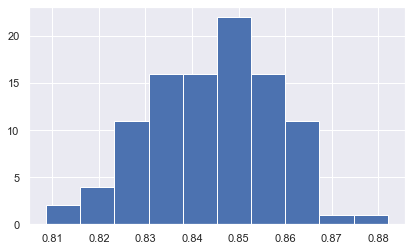

95.0 confidence interval 81.9% and 86.7%


In [386]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [388]:
## RANDOM FOREST REGRESSOR

values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 100        
# size of a bootstrap sample
n_size = int(len(df_ml) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    rfTree = RandomForestRegressor(n_estimators=100)
    # fit against independent variables and corresponding target values
    rfTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = rfTree.score(test[:, :-1] , y_test)
    predictions = rfTree.predict(test[:, :-1])  

    stats.append(score)

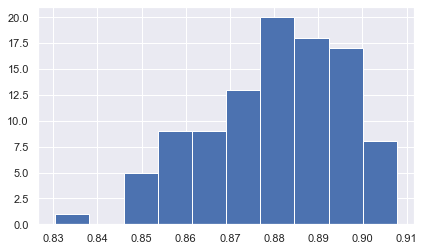

95.0 confidence interval 85.1% and 90.2%


In [389]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

# Conclusion

- The R-square is usually between 0 and 1. However, RMSE does not have a certain interval. It is easier to interpret the R^2. Simply, the model can be expressed as the regression ratio. RMSE shows how much our estimates deviate from the actual values in the data set on average. In some cases we need to look at the R^2, and in some cases we only need to look at the RMSE. If we look at RMSE only, we can not see anything about how much we vary, because it does not add up to how much variability we have in the end. For this reason, it is often useful to review and comment on both.
- K fold gradient boost regressor and K fold random forest regrssor both are good model and do not overfit. 
- We have 95% confidence for Kfold random forest regressor with interval 85.1% to 90.2%

In [398]:
display(results)

,Method,accuracy
1,Random Forest Regressor,0.892238
2,Simple linear regression,0.892238
3,Simple ridge regression,0.892238
94,Gradient Boost Regressor,0.904134
5,Gradient Boost Regressor k fold,0.899431
6,Ada Boosting Regressor,0.767121
7,Ada Boosting Regressor k fold,0.778034
8,Bagging Regressor,0.851250
9,Bagging Regressor k fold,0.897578
10,Ensemble,0.810863
